# Checking runs of the S2Cloudless long-term percentiles from k8s

Data is here: http://dea-public-data-dev.s3-website-ap-southeast-2.amazonaws.com/?prefix=test/ga_s2cloudless_percentiles_3/0-0-1/


In [1]:
import os
import json
import warnings
import xarray as xr
import numpy as np
import rioxarray as rxr
import pandas as pd
import matplotlib.pyplot as plt
from odc.geo.xr import assign_crs

warnings.filterwarnings("ignore")

## Analysis Parameters


In [2]:
year='2021' 
t_range = '2020--P3Y'
x,y = 'x132', 'y174'
name, version = 'ga_s2cloudless_percentiles_3', '0-0-1'

## Stitch together datasets for a tile

In [3]:
base = 'https://dea-public-data-dev.s3-ap-southeast-2.amazonaws.com/test/ga_s2cloudless_percentiles_3/0-0-1/'

In [4]:
arrs = []
for p in ['5','10','25']:
    
    path=f'{x}/{y}/{t_range}/{name}_{x}{y}_{t_range}_final_oa_s2cloudless_prob_pc_{p}.tif'
    da = rxr.open_rasterio(base+path).squeeze().drop_vars('band')
    da.name='oa_s2cloudless_prob_pc_'+p
    da = da.expand_dims(time=[pd.to_datetime(year + "-01-01")]).to_dataset()
    da = assign_crs(da, crs='EPSG:3577')
    arrs.append(da)

ds = assign_crs(xr.merge(arrs), crs='EPSG:3577')
ds

<xarray.Dataset> Size: 246MB
Dimensions:                    (time: 1, x: 3200, y: 3200)
Coordinates:
  * time                       (time) datetime64[ns] 8B 2021-01-01
  * x                          (x) float64 26kB -1.92e+05 -1.92e+05 ... -1.6e+05
  * y                          (y) float64 26kB -1.312e+06 ... -1.344e+06
    spatial_ref                int32 4B 3577
Data variables:
    oa_s2cloudless_prob_pc_5   (time, y, x) float64 82MB 0.0002268 ... 0.005466
    oa_s2cloudless_prob_pc_10  (time, y, x) float64 82MB 0.0008813 ... 0.007156
    oa_s2cloudless_prob_pc_25  (time, y, x) float64 82MB 0.002428 ... 0.01108

## Plot results

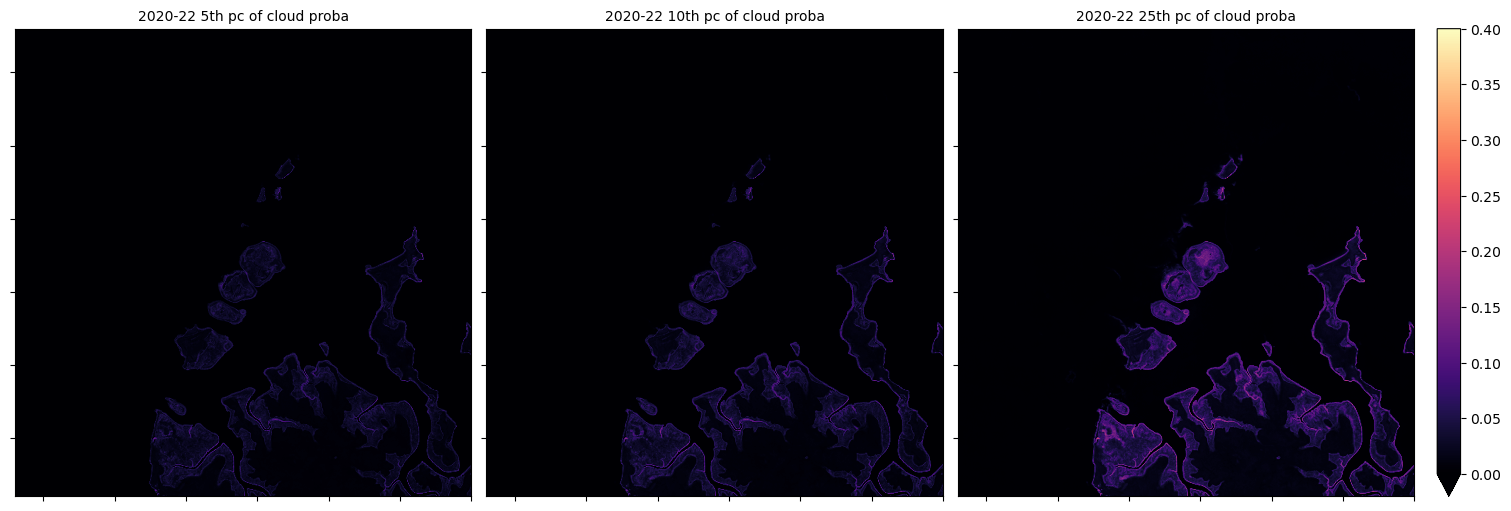

In [5]:
fig, ax= plt.subplots(1,3, sharey=True, figsize=(15,5), layout='constrained')
vmin,vmax=0,0.4
ds['oa_s2cloudless_prob_pc_5'].squeeze().plot.imshow(vmin=vmin, vmax=vmax, ax=ax[0], cmap='magma', add_labels=False, add_colorbar=False)
ds['oa_s2cloudless_prob_pc_10'].squeeze().plot.imshow(vmin=vmin, vmax=vmax, ax=ax[1], cmap='magma', add_labels=False, add_colorbar=False)
ds['oa_s2cloudless_prob_pc_25'].squeeze().plot.imshow(vmin=vmin, vmax=vmax, ax=ax[2], cmap='magma', add_labels=False);

ax[0].set_title(f'2020-22 5th pc of cloud proba', fontsize=10);
ax[0].set_yticklabels([])
ax[0].set_xticklabels([])

ax[1].set_title(f'2020-22 10th pc of cloud proba', fontsize=10);
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])

ax[2].set_title(f'2020-22 25th pc of cloud proba', fontsize=10);
ax[2].set_yticklabels([])
ax[2].set_xticklabels([]);

In [6]:
ds['oa_s2cloudless_prob_pc_10'].odc.explore(
    tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr = 'Esri',
    name = 'Esri Satellite',
    cmap='magma', vmin=vmin, vmax=vmax
              )